<a href="https://colab.research.google.com/github/andreaeddyricci/Webinar-Attendance-Capstone/blob/main/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
from google.colab import drive

In [2]:
import pandas as pd
import string
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from fuzzywuzzy import process, fuzz

/usr/local/lib/python3.9/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


#Loading and Combining the Data

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
path = '/content/gdrive/MyDrive/Springboard/3D_Heals_Project/Riipen_Springboard/Zoom_audience_report/2022_Season_3/Biomaterials/Biomaterials_ Attendee_Report.xlsx'
df_biomaterials = pd.read_excel(path, skiprows=18) #doesn't need index_col=False because it is an excel file
df_biomaterials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 24 columns):
 #   Column                                                                                                                                                 Non-Null Count  Dtype         
---  ------                                                                                                                                                 --------------  -----         
 0   Attended                                                                                                                                               254 non-null    object        
 1   User Name (Original Name)                                                                                                                              253 non-null    object        
 2   First Name                                                                                                                                    

In [7]:
path2 = '/content/gdrive/MyDrive/Springboard/3D_Heals_Project/Riipen_Springboard/Zoom_audience_report/2022_Season_3/Indian_Ecosystem/83184516965_Attendee_Report.csv'
df_indian_eco = pd.read_csv(path2, skiprows=19, index_col=False)

In [8]:
path3 = '/content/gdrive/MyDrive/Springboard/3D_Heals_Project/Riipen_Springboard/Zoom_audience_report/2022_Season_3/Metal_3D_Printing/Metal_3D_Printing/Metal3D_Attendee_Report.csv'
df_metal = pd.read_csv(path3, skiprows=17, index_col=False)

In [9]:
path4 = '/content/gdrive/MyDrive/Springboard/3D_Heals_Project/Riipen_Springboard/Zoom_audience_report/2022_Season_3/Post_Processing/89197257067 - Attendee Report.csv'
df_preprocessing = pd.read_csv(path4, skiprows=15, index_col=False)


In [10]:
print("Biomaterials has " + str(len(df_biomaterials.columns)) + " columns.")
print("Indian Eco has " + str(len(df_indian_eco.columns)) + " columns.")
print("3D metals has " + str(len(df_metal.columns)) + " columns.")
print("Preprocessing has " + str(len(df_preprocessing.columns)) + " columns.")

Biomaterials has 24 columns.
Indian Eco has 23 columns.
3D metals has 23 columns.
Preprocessing has 25 columns.


In [11]:
set(df_biomaterials.columns) - set(df_indian_eco.columns)

{'Linkedin Link'}

In [12]:
set(df_preprocessing.columns) - set(df_indian_eco.columns)

{'Address', 'Phone'}

In [13]:
#remove columns that are not in common
df_preprocessing.drop({'Address', 'Phone'}, axis=1, inplace=True)
df_biomaterials.drop('Linkedin Link', axis=1, inplace=True)

In [14]:
#check all column names
df_preprocessing.columns == df_indian_eco.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [15]:
df_indian_eco.columns == df_metal.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [16]:
df_biomaterials.columns == df_metal.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [17]:
#include title of each webinar
df_biomaterials['webinar_name'] = 'Biomaterials'
df_indian_eco['webinar_name'] = 'Indian Ecosystem'
df_metal['webinar_name'] = '3D Metal'
df_preprocessing['webinar_name'] = 'Preprocessing'

In [18]:
all_dfs = (df_biomaterials, df_indian_eco, df_metal, df_preprocessing)

#Viewing the Data

In [19]:
#put all the data together
df = pd.concat(all_dfs)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 0 to 175
Data columns (total 24 columns):
 #   Column                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                 --------------  ----- 
 0   Attended                                                                                                                                               845 non-null    object
 1   User Name (Original Name)                                                                                                                              841 non-null    object
 2   First Name                                                                                                                                             841 non-null    object


In [20]:
#check out how many missing values we have
df.isna().sum()

Attended                                                                                                                                                   0
User Name (Original Name)                                                                                                                                  4
First Name                                                                                                                                                 4
Last Name                                                                                                                                                 10
Email                                                                                                                                                      4
City                                                                                                                                                     147
Country/Region                                            

In [21]:
df.columns

Index(['Attended', 'User Name (Original Name)', 'First Name', 'Last Name',
       'Email', 'City', 'Country/Region', 'Zip/Postal Code', 'State/Province',
       'Industry', 'Organization', 'Job Title', 'Questions & Comments',
       'Registration Time', 'Approval Status', 'Join Time', 'Leave Time',
       'Time in Session (minutes)', 'Is Guest',
       'I agree that I may be video recorded and acknowledge that I am aware that the recording will be available to the public.',
       'I agree that 3DHEALS can share my information with this event's sponsor and partners (who made this event Free to me.) I can unsubscribe at any time.',
       'Country/Region Name', 'Source Name', 'webinar_name'],
      dtype='object')

In [22]:
#dropping columns we don't need
df.drop(labels=['First Name','Last Name', 'User Name (Original Name)','Zip/Postal Code','Is Guest','Approval Status', 
                'I agree that I may be video recorded and acknowledge that I am aware that the recording will be available to the public.', 
                "I agree that 3DHEALS can share my information with this event's sponsor and partners (who made this event Free to me.) I can unsubscribe at any time."
                ],axis=1, inplace=True)

In [23]:
#not sharing email and organization for privacy
df.drop(labels=['Email','Organization'], axis=1).head()

,Attended,City,Country/Region,State/Province,Industry,Job Title,Questions & Comments,Registration Time,Join Time,Leave Time,Time in Session (minutes),Country/Region Name,Source Name,webinar_name
0,No,Ankara,TR,Other,Manufacturing,NaN,NaN,2022-09-01 09:31:37,--,--,--,Turkey,website,Biomaterials
1,Yes,Abu Dhabi,AE,Other,"Hospital, Clinic, Doctor Office",NaN,NaN,2022-09-01 10:07:48,2022-09-15 08:03:24,2022-09-15 08:23:06,20,United Arab Emirates,mailchimp,Biomaterials
2,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2022-09-15 08:24:20,2022-09-15 09:31:11,67,United Kingdom,NaN,Biomaterials
3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2022-09-15 09:33:47,2022-09-15 09:35:53,3,United Kingdom,NaN,Biomaterials
4,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2022-09-15 09:36:10,2022-09-15 09:41:31,6,United Kingdom,NaN,Biomaterials


In [24]:
df.groupby('webinar_name')['Email'].count().sort_values()

webinar_name
Indian Ecosystem    166
Preprocessing       175
3D Metal            247
Biomaterials        253
Name: Email, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 0 to 175
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Attended                   845 non-null    object
 1   Email                      841 non-null    object
 2   City                       698 non-null    object
 3   Country/Region             689 non-null    object
 4   State/Province             689 non-null    object
 5   Industry                   689 non-null    object
 6   Organization               683 non-null    object
 7   Job Title                  465 non-null    object
 8   Questions & Comments       15 non-null     object
 9   Registration Time          689 non-null    object
 10  Join Time                  830 non-null    object
 11  Leave Time                 830 non-null    object
 12  Time in Session (minutes)  830 non-null    object
 13  Country/Region Name        827 non-null    object
 14  Source Nam

In [26]:
#making time the correct type
df['Join Time'] = pd.to_datetime(df['Join Time'], errors='coerce') 
df['Leave Time'] = pd.to_datetime(df['Leave Time'], errors='coerce')
df['Registration Time'] = pd.to_datetime(df['Registration Time'], errors='coerce')

In [27]:
df[(df['Time in Session (minutes)'].isna()) | (df['Time in Session (minutes)'] == '--')].drop(labels=['Email','Organization'], axis=1)

,Attended,City,Country/Region,State/Province,Industry,Job Title,Questions & Comments,Registration Time,Join Time,Leave Time,Time in Session (minutes),Country/Region Name,Source Name,webinar_name
0,No,Ankara,TR,Other,Manufacturing,NaN,NaN,2022-09-01 09:31:37,NaT,NaT,--,Turkey,website,Biomaterials
5,No,Agadir,MA,Other,"Medical, Pharma, Biotech",Phd,NaN,2022-09-02 05:24:55,NaT,NaT,--,Morocco,mailchimp,Biomaterials
6,No,Gothenburg,SE,Other,"Medical, Pharma, Biotech",Global Product Manager,NaN,2022-09-06 04:31:38,NaT,NaT,--,Sweden,mailchimp,Biomaterials
7,No,Amsterdam,NL,Other,Manufacturing,NaN,NaN,2022-09-06 04:31:43,NaT,NaT,--,Netherlands,mailchimp,Biomaterials
8,No,Melville,US,NY,Legal,Partner,NaN,2022-09-06 04:32:12,NaT,NaT,--,United States,mailchimp,Biomaterials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,No,Montmelo,ES,Other,Manufacturing,Global 3DP Commercial Lead,NaN,2022-10-06 08:01:59,NaT,NaT,--,Spain,LinkedIn,Preprocessing
171,No,São Julião do Tojal,PT,Outra,Other,RA Manager,NaN,2022-10-06 08:43:30,NaT,NaT,--,Portugal,LinkedIn,Preprocessing
173,Other Attended,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,Preprocessing
174,User Name,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,Preprocessing


In [28]:
df[(df['Attended'] == 'No')]['Time in Session (minutes)'].unique()

array(['--'], dtype=object)

In [29]:
#For those who didn't attend, their time in session should be 0 (instead of --)
df.loc[(df['Attended'] == 'No'),'Time in Session (minutes)'] = 0

In [30]:
#missing times will be given 0 minutes
df['Time in Session (minutes)'] = df['Time in Session (minutes)'].fillna(0)

In [31]:
df['Time in Session (minutes)'] = df['Time in Session (minutes)'].astype('int')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 0 to 175
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Attended                   845 non-null    object        
 1   Email                      841 non-null    object        
 2   City                       698 non-null    object        
 3   Country/Region             689 non-null    object        
 4   State/Province             689 non-null    object        
 5   Industry                   689 non-null    object        
 6   Organization               683 non-null    object        
 7   Job Title                  465 non-null    object        
 8   Questions & Comments       15 non-null     object        
 9   Registration Time          689 non-null    datetime64[ns]
 10  Join Time                  450 non-null    datetime64[ns]
 11  Leave Time                 450 non-null    datetime64[ns]
 12  Time in 

In [33]:
df.columns

Index(['Attended', 'Email', 'City', 'Country/Region', 'State/Province',
       'Industry', 'Organization', 'Job Title', 'Questions & Comments',
       'Registration Time', 'Join Time', 'Leave Time',
       'Time in Session (minutes)', 'Country/Region Name', 'Source Name',
       'webinar_name'],
      dtype='object')

In [34]:
df.describe()

,Time in Session (minutes)
count,845.000000
mean,23.857988
std,35.087483
min,0.000000
25%,0.000000
50%,2.000000
75%,43.000000
max,129.000000


In [35]:
df['Attended'].unique()

array(['No', 'Yes', 'Other Attended', 'User Name', 19176429644,
       12022514648, 14123599627, 18322983212, '0114915776295912',
       '17142381131', '15184664566'], dtype=object)

#Cleaning the Job Titles

Job titles were typed in manually by the user.  I am going to group these into approximately 10 job titles.



In [36]:
#replace missing job titles with "Not Given"
df['Job Title'].fillna(value = "Not Given",inplace=True)

In [37]:
#lowercase all the job titles
df['Job Title']=df['Job Title'].apply(str.lower)

In [38]:
#remove punctuation
df['Job Title'] = df['Job Title'].str.replace('[^\w\s]','')

<ipython-input-38-4ffb9b2f9e06>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Job Title'] = df['Job Title'].str.replace('[^\w\s]','')


In [39]:
unique_job_titles = df['Job Title'].unique().tolist()

In [40]:
print("We have " + str(len(unique_job_titles)) + " unique job titles")

We have 259 unique job titles


In [41]:
#convert the list to a dataframe
df_unique_job_titles = pd.DataFrame(unique_job_titles, columns=["Title"])
df_unique_job_titles.head()

,Title
0,not given
1,phd
2,global product manager
3,partner
4,professor


In [42]:
#currently there are no job titles called "C-suite"
len(df[df['Job Title'] == "C-suite"])

0

In [43]:
#The token sort ratio scorer tokenizes the strings and cleans them by returning these strings to lower cases, removing punctuations, and then sorting them alphabetically. 
#After that, it finds the Levenshtein distance and returns the similarity percentage.
#https://towardsdatascience.com/fuzzywuzzy-find-similar-strings-within-one-column-in-a-pandas-data-frame-99f6c2a0c212
process.extract('ceo', unique_job_titles, scorer=fuzz.token_sort_ratio, limit=10)

[('ceo', 100),
 ('coo', 67),
 ('cto', 67),
 ('cso', 67),
 ('coa', 67),
 ('cfo', 67),
 ('cpo', 67),
 ('cmo', 67),
 ('ceofounder', 46),
 ('fellow', 44)]

If we want to use thresholds instead of limits (less manual work, but more errors), we will use extractBests.  I have chosen  score cutoffs of 60-80 based on which cutoff gives the most accurate results.

Also, the token set ratio is more flexible VS sort ratio.  So I will use that as well.

In [44]:
#I grouped engineers
engineer_matches = process.extractBests('engineer', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
                  process.extractBests('eng', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
                  process.extractBests('ingeniero', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None)


engineer_matches

[('research engineer consultant', 100),
 ('applications engineer', 100),
 ('biomedical engineer', 100),
 ('product development engineer', 100),
 ('principal engineer', 100),
 ('engineer  rd', 100),
 ('healthcare applications engineer', 100),
 ('operation engineer ', 100),
 ('senior design engineer', 100),
 ('fpga engineer', 100),
 ('biomedical design engineer', 100),
 ('rd mechanical engineer', 100),
 ('senior dev engineer', 100),
 ('design engineer', 100),
 ('senior engineer', 100),
 ('rd engineer', 100),
 ('application engineer', 100),
 ('quality assurance engineer', 100),
 ('medical device engineer', 100),
 ('biomechanical engineer', 100),
 ('research engineer', 100),
 ('cad cam engineer', 100),
 ('mechanical engineer', 100),
 ('sr engineer', 100),
 ('systems engineer', 100),
 ('development engineer', 100),
 ('staff engineer ', 100),
 ('application engineer manager', 100),
 ('manufacturing engineer', 100),
 ('rd engineer and owner of mr wus 3d printer corner', 100),
 ('manufacturing

In [45]:
#I grouped c-suite titles, president, owner, and founders together
CEO_matches = process.extractBests('ceo', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) +\
          process.extractBests('chief', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
          process.extractBests('president', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
          process.extractBests('founder', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
          process.extractBests('owner', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=80, limit=None)
CEO_matches

[('ceo', 100),
 ('president  ceo', 100),
 ('founder and ceo', 100),
 ('coo', 67),
 ('cto', 67),
 ('cso', 67),
 ('coa', 67),
 ('cfo', 67),
 ('cpo', 67),
 ('cmo', 67),
 ('chief researcher', 100),
 ('chief executive officer', 100),
 ('chief of operations', 100),
 ('president', 100),
 ('president  ceo', 100),
 ('presidente', 95),
 ('founder and managing member', 100),
 ('founder', 100),
 ('founder ', 100),
 ('founder and ceo', 100),
 ('founder  executive director', 100),
 ('cofounder', 88),
 ('ceofounder', 82),
 ('coo cofounder', 70),
 ('owner', 67),
 ('owner', 100),
 ('rd engineer and owner of mr wus 3d printer corner', 100),
 ('coowner', 83),
 ('owern', 80)]

In [46]:
#I grouped student, phd, professor, teacher, lecturer, postdoc, and educator
academic_matches = process.extractBests('professor', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
                    process.extractBests('teacher', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=80, limit=None) + \
                    process.extractBests('lecturer', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
                    process.extractBests('educator', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=80, limit=None) + \
                    process.extractBests('prof', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=80, limit=None) +\
                    process.extractBests('postdoctoral', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=70, limit=None) + \
                    process.extractBests('student', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
                    process.extractBests('phd', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) 
academic_matches

[('professor', 100),
 ('associate professor', 100),
 ('assistant professor of mechanical and biomedical engineering', 100),
 ('assistant professor', 100),
 ('professor  pesquisador', 100),
 ('assistant professor ', 100),
 ('assistant professor in the department of mechanical engineering', 100),
 ('porfessor', 89),
 ('teacher', 100),
 ('lecturer', 100),
 ('leiter', 71),
 ('educator', 100),
 ('asst prof', 100),
 ('aprof', 89),
 ('postdoctoral researcher', 100),
 ('postdoctoral fellow', 100),
 ('postdoctoral research associate', 100),
 ('postdoc', 74),
 ('phd student', 100),
 ('student', 100),
 ('undergraduate student', 100),
 ('bsc student', 100),
 ('graduate student', 100),
 ('graduate student researcher', 100),
 ('student learning assistant', 100),
 ('student researcher', 100),
 ('medical student', 100),
 ('biomedical engineering student', 100),
 ('grad student', 100),
 ('raphd student', 100),
 ('phd studend', 67),
 ('phd', 100),
 ('phd student', 100),
 ('phd scholar', 100),
 ('phd stu

In [47]:
#I grouped manager and director
manager_matches = process.extractBests('manager', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=63, limit=None) +\
                  process.extractBests('director', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=80, limit=None)
manager_matches

[('global product manager', 100),
 ('project manager', 100),
 ('business manager', 100),
 ('senior engineering manager', 100),
 ('3d engineerprogram manager', 100),
 ('3d printing manager', 100),
 ('application manager', 100),
 ('client engagement manager', 100),
 ('business development manager', 100),
 ('engineering manager', 100),
 ('manager', 100),
 ('rd manager', 100),
 ('global marketing manager', 100),
 ('healthcare product manager', 100),
 ('clinical manager', 100),
 ('application engineer manager', 100),
 ('sales manager', 100),
 ('quality manager', 100),
 ('sales ops manager', 100),
 ('manager  sales and bd', 100),
 ('general manager', 100),
 ('ra manager', 100),
 ('plant manger', 63),
 ('plant manger ', 63),
 ('director of product', 100),
 ('director', 100),
 ('managing director', 100),
 ('strategy director', 100),
 ('3d lab program director', 100),
 ('director of preclinical research', 100),
 ('rd director', 100),
 ('director ingenieria  operaciones', 100),
 ('program direct

In [48]:
not_given_matches = process.extractBests('not', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=57, limit=None)
not_given_matches

[('not given', 100), ('no', 80), ('none', 57)]

In [49]:
#I grouped researcher, chemist and scientist
researcher_matches = process.extractBests('chemist', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=62, limit=None) +\
                      process.extractBests('scientist', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=62, limit=None) +\
                      process.extractBests('research', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=62, limit=None) + \
                    process.extractBests('fellow', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
                    process.extractBests('rd', unique_job_titles, scorer=fuzz.token_sort_ratio, score_cutoff=65, limit=None)
                      
researcher_matches

[('organic chemist synthesis department leader', 100),
 ('chemist', 100),
 ('scientist', 62),
 ('srrd scientist', 100),
 ('rd scientist', 100),
 ('sr principal scientist', 100),
 ('research scientist', 100),
 ('sr rd scientist', 100),
 ('scientist', 100),
 ('biomaterials research scientist', 100),
 ('specialist', 63),
 ('chemist', 62),
 ('research engineer consultant', 100),
 ('research scholar', 100),
 ('research fellow', 100),
 ('phd research scholar', 100),
 ('junior research fellow', 100),
 ('research associate', 100),
 ('research assistant', 100),
 ('research scientist', 100),
 ('senior research fellow ji', 100),
 ('postdoctoral research associate', 100),
 ('director of preclinical research', 100),
 ('research intern', 100),
 ('assistant research fellow', 100),
 ('research specialist', 100),
 ('senior research fellow', 100),
 ('research engineer', 100),
 ('biomaterials research scientist', 100),
 ('researcher', 89),
 ('resercher', 82),
 ('chief researcher', 67),
 ('senior research

In [50]:
#I grouped doctor, md, surgeon, orthodontist, veterinarian, and radiology
medicine_matches = process.extractBests('medicine', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
  process.extractBests('md', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
  process.extractBests('doctor', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=80, limit=None) + \
  process.extractBests('dr', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=80, limit=None) + \
  process.extractBests('radiology', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) +\
  process.extractBests('surgeon', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) +\
  process.extractBests('surgery', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) +\
  process.extractBests('orthodontist', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) +\
  process.extractBests('veterinarian', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None)
  
medicine_matches

[('head of aesthetic medicine and exploratory products', 100),
 ('medicine', 100),
 ('doctor of medicine', 100),
 ('md phd', 100),
 ('md', 100),
 ('doctor of medicine', 100),
 ('doctor', 100),
 ('dr', 100),
 ('radiología', 89),
 ('radiologist', 80),
 ('craniofacialplastic surgeon', 100),
 ('endoscopic spine surgery specialist', 100),
 ('orthodontist', 100),
 ('veterinarian ', 100)]

In [51]:
#I grouped marketing, ae, and sales
marketing_matches = process.extractBests('marketing', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
                    process.extractBests('sales', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
                    process.extractBests('ae', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None)
marketing_matches

[('marketing and strategy', 100),
 ('global marketing manager', 100),
 ('svp  marketing', 100),
 ('content  marketing specialist', 100),
 ('global marketing', 100),
 ('marketing', 100),
 ('sales executive', 100),
 ('sales manager', 100),
 ('sales', 100),
 ('technical sales engineer', 100),
 ('sales ops manager', 100),
 ('manager  sales and bd', 100),
 ('ae', 100)]

In [52]:
designer_matches = process.extractBests('design', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) + \
                  process.extractBests('designer', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None)
designer_matches

[('senior design engineer', 100),
 ('biomedical design engineer', 100),
 ('production  design lead', 100),
 ('design engineer', 100),
 ('production  design', 100),
 ('designer', 86),
 ('3d designer', 71),
 ('cad designer', 67),
 ('product designer', 100),
 ('3d designer', 100),
 ('cad designer', 100),
 ('designer', 100),
 ('design engineer', 70)]

In [53]:
#I add a consultant/freelancer category
consultant_matches = process.extractBests('consultant', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) +\
                      process.extractBests('free lance', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None)
consultant_matches

[('research engineer consultant', 100),
 ('principal consultant', 100),
 ('consultant', 100),
 ('consultant ', 100),
 ('freelancer', 90)]

In [54]:
investor_matches = process.extractBests('investor', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None)
investor_matches

[('diretor', 67)]

In [55]:
# I added an operator category
operator_matches = process.extractBests('operator', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None)
operator_matches

[('operator', 100), ('operations', 78)]

In [56]:
# I added a business developer category
business_matches = process.extractBests('business develop', unique_job_titles, scorer=fuzz.token_set_ratio, score_cutoff=70, limit=None)
business_matches

[('business development', 89),
 ('new business development', 80),
 ('business development lead', 78),
 ('business development manager', 73),
 ('new business development mgr', 73)]

In [57]:
#assign all the matches to a Job Title Category
df.loc[(df['Job Title'].isin(list(zip(*CEO_matches))[0])),'Job Title Category'] = 'C-Suite'
df.loc[(df['Job Title'].isin(list(zip(*engineer_matches))[0])),'Job Title Category'] = 'Engineer'
df.loc[(df['Job Title'].isin(list(zip(*academic_matches))[0])),'Job Title Category'] = 'Academic'
df.loc[(df['Job Title'].isin(list(zip(*manager_matches))[0])),'Job Title Category'] = 'Manager, Director'
df.loc[(df['Job Title'].isin(list(zip(*researcher_matches))[0])),'Job Title Category'] = 'Researcher'
df.loc[(df['Job Title'].isin(list(zip(*not_given_matches))[0])),'Job Title Category'] = 'None'
df.loc[(df['Job Title'].isin(list(zip(*medicine_matches))[0])),'Job Title Category'] = 'Clinician'
df.loc[(df['Job Title'].isin(list(zip(*marketing_matches))[0])),'Job Title Category'] = 'Marketer, Salesperson'
df.loc[(df['Job Title'].isin(list(zip(*designer_matches))[0])),'Job Title Category'] = 'Designer'
df.loc[(df['Job Title'].isin(list(zip(*consultant_matches))[0])),'Job Title Category'] = 'Consultant'
df.loc[(df['Job Title'].isin(list(zip(*operator_matches))[0])),'Job Title Category'] = 'Operator'
df.loc[(df['Job Title'].isin(list(zip(*business_matches))[0])),'Job Title Category'] = 'Business Developer'

In [58]:
#how many job titles in each category
df['Job Title Category'].value_counts()

None                     382
Academic                  93
C-Suite                   68
Researcher                62
Manager, Director         57
Engineer                  49
Clinician                 22
Marketer, Salesperson     16
Designer                  12
Business Developer        11
Consultant                 9
Operator                   2
Name: Job Title Category, dtype: int64

In [59]:
#the total number of job titles with a category
df['Job Title Category'].value_counts().sum()

783

In [60]:
#the percentage of job titles with a category
df['Job Title Category'].value_counts().sum()/df['Job Title'].value_counts().sum()

0.9266272189349113

Questions to consider:


*   Are these appropriate categories?
*   Are they too overlapping?
*   What else should be added?
*   Can any be combined?
*   What about all the 'None'?
*   What categories are most important? (Should trump the others - IE engineer and founder will only be labeled as whatever category is run most recently)





In [61]:
#original data now with an additional column called "Job Title Category"
df.drop(labels=['Email','Organization'], axis=1).head(20)

,Attended,City,Country/Region,State/Province,Industry,Job Title,Questions & Comments,Registration Time,Join Time,Leave Time,Time in Session (minutes),Country/Region Name,Source Name,webinar_name,Job Title Category
0,No,Ankara,TR,Other,Manufacturing,not given,NaN,2022-09-01 09:31:37,NaT,NaT,0,Turkey,website,Biomaterials,None
1,Yes,Abu Dhabi,AE,Other,"Hospital, Clinic, Doctor Office",not given,NaN,2022-09-01 10:07:48,2022-09-15 08:03:24,2022-09-15 08:23:06,20,United Arab Emirates,mailchimp,Biomaterials,None
2,Yes,NaN,NaN,NaN,NaN,not given,NaN,NaT,2022-09-15 08:24:20,2022-09-15 09:31:11,67,United Kingdom,NaN,Biomaterials,None
3,Yes,NaN,NaN,NaN,NaN,not given,NaN,NaT,2022-09-15 09:33:47,2022-09-15 09:35:53,3,United Kingdom,NaN,Biomaterials,None
4,Yes,NaN,NaN,NaN,NaN,not given,NaN,NaT,2022-09-15 09:36:10,2022-09-15 09:41:31,6,United Kingdom,NaN,Biomaterials,None
5,No,Agadir,MA,Other,"Medical, Pharma, Biotech",phd,NaN,2022-09-02 05:24:55,NaT,NaT,0,Morocco,mailchimp,Biomaterials,Academic
6,No,Gothenburg,SE,Other,"Medical, Pharma, Biotech",global product manager,NaN,2022-09-06 04:31:38,NaT,NaT,0,Sweden,mailchimp,Biomaterials,"Manager, Director"
7,No,Amsterdam,NL,Other,Manufacturing,not given,NaN,2022-09-06 04:31:43,NaT,NaT,0,Netherlands,mailchimp,Biomaterials,None
8,No,Melville,US,NY,Legal,partner,NaN,2022-09-06 04:32:12,NaT,NaT,0,United States,mailchimp,Biomaterials,NaN
9,No,Szeged,HU,Other,Education,not given,NaN,2022-09-06 04:32:56,NaT,NaT,0,Hungary,mailchimp,Biomaterials,None


In [62]:
#Who is left without a category?
jobs_without_category = df[df['Job Title Category'].isna()]['Job Title'].tolist()
jobs_without_category

['partner',
 'dental techichan',
 'develer',
 'rd engineering associate',
 'sr dir clin ops',
 'vp  technology  innovation ',
 'partner',
 'analista de produto',
 'bme',
 'dvsc',
 'öğrenci',
 'head of materials development 3d printing',
 'business analyst',
 'vp of biomaterials and innovation',
 'sr',
 'educador y coach',
 'bdm',
 'partner',
 'simulation technology technician',
 'product management',
 'hp mjf 3d print services ',
 'intern',
 'global dental lead',
 'associate',
 'hr head',
 'partner',
 'arketing  strategy',
 '3d incubation ',
 'private',
 'developer',
 'orthotistprosthetist',
 'plant head',
 'vp quality and regulatory',
 'impresión 3d',
 'lisans öğrencisi',
 '3d uygulama mühendisi',
 'managing partner',
 'coordinador general',
 'analista de projetos ',
 'öğrenci',
 'additive manufacturing coordinator',
 'researchdevelopment leader',
 'senior assessor',
 'dvsc',
 'öğrenci',
 'client partner',
 'employee',
 'partner',
 'coordinadora de diseño',
 'retired',
 'partner',
 'f

In [63]:
len(jobs_without_category)

62

## Save the data to a new csv

In [64]:

os.makedirs('/content/gdrive/MyDrive/Springboard/3D_Heals_Project/Riipen_Springboard/', exist_ok=True)  
df.to_csv('/content/gdrive/MyDrive/Springboard/3D_Heals_Project/Riipen_Springboard/combined_webinars.csv')


#Cleaning Duplicated Values

In [65]:
df.isna().sum()

Attended                       0
Email                          4
City                         147
Country/Region               156
State/Province               156
Industry                     156
Organization                 162
Job Title                      0
Questions & Comments         830
Registration Time            156
Join Time                    395
Leave Time                   395
Time in Session (minutes)      0
Country/Region Name           18
Source Name                  185
webinar_name                   0
Job Title Category            62
dtype: int64

In [66]:
df.isna().sum()

Attended                       0
Email                          4
City                         147
Country/Region               156
State/Province               156
Industry                     156
Organization                 162
Job Title                      0
Questions & Comments         830
Registration Time            156
Join Time                    395
Leave Time                   395
Time in Session (minutes)      0
Country/Region Name           18
Source Name                  185
webinar_name                   0
Job Title Category            62
dtype: int64

In [67]:
df.duplicated().sum()

0

In [68]:
#all the duplicated rows based on email and webinar name
df[df.duplicated(subset=['Email','webinar_name'])].drop(labels=['Email','Organization'], axis=1).head(10)

,Attended,City,Country/Region,State/Province,Industry,Job Title,Questions & Comments,Registration Time,Join Time,Leave Time,Time in Session (minutes),Country/Region Name,Source Name,webinar_name,Job Title Category
2,Yes,NaN,NaN,NaN,NaN,not given,NaN,NaT,2022-09-15 08:24:20,2022-09-15 09:31:11,67,United Kingdom,NaN,Biomaterials,None
3,Yes,NaN,NaN,NaN,NaN,not given,NaN,NaT,2022-09-15 09:33:47,2022-09-15 09:35:53,3,United Kingdom,NaN,Biomaterials,None
4,Yes,NaN,NaN,NaN,NaN,not given,NaN,NaT,2022-09-15 09:36:10,2022-09-15 09:41:31,6,United Kingdom,NaN,Biomaterials,None
31,Yes,NaN,NaN,NaN,NaN,not given,NaN,NaT,2022-09-15 08:40:15,2022-09-15 09:26:50,47,India,NaN,Biomaterials,None
32,Yes,NaN,NaN,NaN,NaN,not given,NaN,NaT,2022-09-15 09:27:34,2022-09-15 09:41:32,14,India,NaN,Biomaterials,None
50,Yes,NaN,NaN,NaN,NaN,not given,NaN,NaT,2022-09-15 09:12:04,2022-09-15 09:41:31,30,India,NaN,Biomaterials,None
57,Yes,NaN,NaN,NaN,NaN,not given,NaN,NaT,2022-09-15 08:10:28,2022-09-15 09:10:12,60,India,NaN,Biomaterials,None
111,Yes,NaN,NaN,NaN,NaN,not given,NaN,NaT,2022-09-15 08:25:24,2022-09-15 09:41:30,77,United States,NaN,Biomaterials,None
125,Yes,NaN,NaN,NaN,NaN,not given,NaN,NaT,2022-09-15 08:52:34,2022-09-15 09:19:26,27,Israel,NaN,Biomaterials,None
153,Yes,NaN,NaN,NaN,NaN,not given,NaN,NaT,2022-09-15 08:46:15,2022-09-15 09:23:28,38,United States,NaN,Biomaterials,None


In [69]:
#list of duplicated email addresses
multiple_logins = df[df.duplicated(subset=['Email','webinar_name'])]['Email'].tolist()

Text(0, 0.5, 'Frequency')

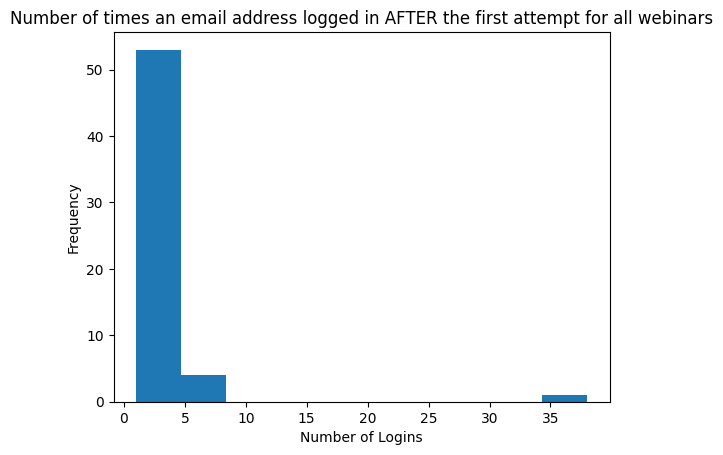

In [70]:
#number of times an email address logged in AFTER the first attempt for all webinars
dictionary_of_logins = {} 
for email in multiple_logins: 
    if email in dictionary_of_logins: 
         dictionary_of_logins[email] += 1 
    else: 
         dictionary_of_logins[email] = 1
plt.hist(dictionary_of_logins.values())
plt.title('Number of times an email address logged in AFTER the first attempt for all webinars')
plt.xlabel('Number of Logins')
plt.ylabel('Frequency')

In [71]:
#create a total time column
df['Total_time'] = df.groupby(['Email','webinar_name'])['Time in Session (minutes)'].transform('sum')

In [72]:
#create a column for the number of times a participant logged in
df['Number_of_Logins'] = df.groupby(['Email','webinar_name'])['Join Time'].transform('count')

In [73]:
#Example of a participant that logged in multiple times
#df[df['Email']=='']

In [74]:
df.columns

Index(['Attended', 'Email', 'City', 'Country/Region', 'State/Province',
       'Industry', 'Organization', 'Job Title', 'Questions & Comments',
       'Registration Time', 'Join Time', 'Leave Time',
       'Time in Session (minutes)', 'Country/Region Name', 'Source Name',
       'webinar_name', 'Job Title Category', 'Total_time', 'Number_of_Logins'],
      dtype='object')

In [75]:
#define how to aggregate various fields
#inspiration: https://www.statology.org/pandas-combine-rows-with-same-column-value/
agg_functions = {
              'Attended':'first', 
              'Email':'first', 
              'City':'first', 
              'Country/Region':'first',
              'State/Province':'first', 
              'Industry':'first', 
              'Organization':'first', 
              'Job Title':'first',
              'Questions & Comments':'first', 
              'Registration Time':'first', 
              'Join Time':'first', 
              'Leave Time':'last',
              'Time in Session (minutes)':'sum', 
              'Country/Region Name':'first', 
              'Source Name':'first',
              'webinar_name':'first', 
              'Job Title Category':'first', 
              'Total_time':'first',
              'Number_of_Logins':'first'
}

#create new DataFrame by combining rows with same id values
df_no_duplicates = df.groupby(['Email','webinar_name']).aggregate(agg_functions)

In [76]:
#df_no_duplicates.head(10)

In [77]:
df_no_duplicates = df_no_duplicates.set_index('Email').reset_index()

In [78]:
df_no_duplicates.drop(labels=['Email','Organization'], axis=1).head()

,Attended,City,Country/Region,State/Province,Industry,Job Title,Questions & Comments,Registration Time,Join Time,Leave Time,Time in Session (minutes),Country/Region Name,Source Name,webinar_name,Job Title Category,Total_time,Number_of_Logins
0,No,Pune,IN,Other,Software - Other,developer,None,2022-08-29 12:32:37,NaT,NaT,0,India,mailchimp,3D Metal,None,0.0,0.0
1,No,Pune,IN,Other,Other,develer,None,2022-09-06 12:48:32,NaT,NaT,0,India,mailchimp,Biomaterials,None,0.0,0.0
2,Yes,bazpur,IN,Other,Education,not given,None,2022-08-22 23:43:21,2022-09-01 08:00:52,2022-09-01 10:09:13,141,India,mailchimp,Indian Ecosystem,None,141.0,5.0
3,No,Kayseri,TR,Other,High Tech - Other,phd student,None,2022-09-06 22:29:58,NaT,NaT,0,Turkey,Linkedin,Biomaterials,Academic,0.0,0.0
4,No,Nairobi,KE,Other,High Tech - Other,founder,None,2022-09-29 01:19:43,NaT,NaT,0,Kenya,Website,Preprocessing,C-Suite,0.0,0.0


#Cleaning Missing Values

In [79]:
df_no_duplicates['Attended'].value_counts(normalize=True)

No                  0.545194
Yes                 0.443329
User Name           0.005739
17142381131         0.001435
19176429644         0.001435
0114915776295912    0.001435
15184664566         0.001435
Name: Attended, dtype: float64

In [80]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Email                      697 non-null    object        
 1   Attended                   697 non-null    object        
 2   City                       695 non-null    object        
 3   Country/Region             689 non-null    object        
 4   State/Province             689 non-null    object        
 5   Industry                   689 non-null    object        
 6   Organization               683 non-null    object        
 7   Job Title                  697 non-null    object        
 8   Questions & Comments       15 non-null     object        
 9   Registration Time          689 non-null    datetime64[ns]
 10  Join Time                  309 non-null    datetime64[ns]
 11  Leave Time                 309 non-null    datetime64[ns]
 12  Time in 

In [81]:
df_no_duplicates.isna().sum()

Email                          0
Attended                       0
City                           2
Country/Region                 8
State/Province                 8
Industry                       8
Organization                  14
Job Title                      0
Questions & Comments         682
Registration Time              8
Join Time                    388
Leave Time                   388
Time in Session (minutes)      0
Country/Region Name           10
Source Name                   37
webinar_name                   0
Job Title Category            61
Total_time                     0
Number_of_Logins               0
dtype: int64

In [82]:
#drop rows if it does not have at least 50% values that are **not** NaN
without_missing_rows = df_no_duplicates.dropna(thresh=.5*len(df_no_duplicates.columns))

len(without_missing_rows)/len(df_no_duplicates)

0.9885222381635581

In [83]:
#we would still have 99% of our data, so we will drop the missing rows
df_no_duplicates.dropna(thresh=.5*len(df_no_duplicates.columns), inplace=True)

In [84]:
df_no_duplicates.isna().sum()

Email                          0
Attended                       0
City                           0
Country/Region                 0
State/Province                 0
Industry                       0
Organization                   6
Job Title                      0
Questions & Comments         674
Registration Time              0
Join Time                    380
Leave Time                   380
Time in Session (minutes)      0
Country/Region Name            2
Source Name                   29
webinar_name                   0
Job Title Category            61
Total_time                     0
Number_of_Logins               0
dtype: int64

In [85]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 0 to 696
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Email                      689 non-null    object        
 1   Attended                   689 non-null    object        
 2   City                       689 non-null    object        
 3   Country/Region             689 non-null    object        
 4   State/Province             689 non-null    object        
 5   Industry                   689 non-null    object        
 6   Organization               683 non-null    object        
 7   Job Title                  689 non-null    object        
 8   Questions & Comments       15 non-null     object        
 9   Registration Time          689 non-null    datetime64[ns]
 10  Join Time                  309 non-null    datetime64[ns]
 11  Leave Time                 309 non-null    datetime64[ns]
 12  Time in 

In [86]:
# fill no questions with 0
df_no_duplicates['Questions & Comments'] = df_no_duplicates['Questions & Comments'].fillna(0)

In [87]:
# what questions/comments are left?
comments = df_no_duplicates['Questions & Comments'].unique().tolist()
comments

[0,
 'No',
 '4D Printing applications in medical metal 3d printing?',
 'What level of precision and tolerance do you achieve with your prints?  \nWhat are the biggest technical challenges in achieving desired precision and tolerances? \nWhat could be improved in the source segmentation software that would aid in printing desired quality and precision?\nthank you!\n',
 "During that time I will take part in a conference in another city. I don't know the exact period of my presentation but I hope that it will not cross this presentation.",
 'None',
 'no',
 'Are there any volatile organic compounds (VOC) in post-processing?  What is the OSHA regulation regarding this? ',
 'How do you see Binder Jet printing fitting in for medical solutions?',
 'May I get the video of this event?',
 'Not at this moment',
 'Need info',
 'No comments',
 'In the "Industry" list,  I\'m also wondering which category of Industry that I\'ll select.']

In [88]:
no_comment_matches = process.extractBests('no', comments, scorer=fuzz.token_set_ratio, score_cutoff=65, limit=None) +\
                      process.extractBests('not at this moment', comments, scorer=fuzz.token_sort_ratio, score_cutoff=65, limit=None)
no_comment_matches

[('No', 100),
 ('no', 100),
 ('No comments', 100),
 ('None', 67),
 ('Not at this moment', 100)]

In [89]:
# assign no comments to 0
df_no_duplicates.loc[(df_no_duplicates['Questions & Comments'].isin(list(zip(*no_comment_matches))[0])),'Questions & Comments'] = 0

In [90]:
#assign comments to 1
df_no_duplicates.loc[(df_no_duplicates['Questions & Comments'] != 0),'Questions & Comments'] = 1

In [91]:
df_no_duplicates['Questions & Comments'].value_counts()

0    681
1      8
Name: Questions & Comments, dtype: int64

In [92]:
df_no_duplicates['Source Name'].value_counts(normalize=True)

mailchimp    0.421212
Mailchimp    0.156061
Linkedin     0.143939
website      0.125758
linkedin     0.065152
LinkedIn     0.042424
Website      0.039394
Instagram    0.006061
Name: Source Name, dtype: float64

In [93]:
#Fill missing source name with the mode
df_no_duplicates['Source Name'].fillna(df_no_duplicates['Source Name'].mode()[0], inplace=True)

In [94]:
#lowercase all the sources
df_no_duplicates['Source Name']=df_no_duplicates['Source Name'].apply(str.lower)

In [95]:
#Fill missing job title category with 'Other'
df_no_duplicates['Job Title Category'].fillna('Other', inplace=True)

In [96]:
df_no_duplicates.isna().sum()

Email                          0
Attended                       0
City                           0
Country/Region                 0
State/Province                 0
Industry                       0
Organization                   6
Job Title                      0
Questions & Comments           0
Registration Time              0
Join Time                    380
Leave Time                   380
Time in Session (minutes)      0
Country/Region Name            2
Source Name                    0
webinar_name                   0
Job Title Category             0
Total_time                     0
Number_of_Logins               0
dtype: int64

In [97]:
df_no_duplicates[df_no_duplicates['Country/Region Name'].isna()].drop(labels=['Email','Organization'], axis=1)

,Attended,City,Country/Region,State/Province,Industry,Job Title,Questions & Comments,Registration Time,Join Time,Leave Time,Time in Session (minutes),Country/Region Name,Source Name,webinar_name,Job Title Category,Total_time,Number_of_Logins
562,Yes,Tehran,Other,Other,Other,not given,0,2022-09-15 08:08:11,2022-09-15 08:08:48,2022-09-15 08:44:12,36,None,linkedin,Biomaterials,None,36.0,2.0
622,No,Karaj,Other,Other,Education,dvsc,0,2022-09-25 20:44:23,NaT,NaT,0,None,instagram,Preprocessing,Other,0.0,0.0


In [98]:
# Fill missing Country/Region with 'Other'
df_no_duplicates.loc[(df_no_duplicates['Country/Region Name'].isna()),'Country/Region Name'] = 'Other'

In [99]:
df_no_duplicates[df_no_duplicates['Organization'].isna()].drop(labels=['Email','Organization'], axis=1)

,Attended,City,Country/Region,State/Province,Industry,Job Title,Questions & Comments,Registration Time,Join Time,Leave Time,Time in Session (minutes),Country/Region Name,Source Name,webinar_name,Job Title Category,Total_time,Number_of_Logins
167,Yes,Manchester,US,NH,Accounting,director,0,2022-09-15 08:26:08,2022-09-15 08:26:14,2022-09-15 09:10:08,44,United States,mailchimp,Biomaterials,"Manager, Director",44.0,1.0
429,No,Uluberia,IN,Other,Other,not given,0,2022-09-26 04:46:05,NaT,NaT,0,India,mailchimp,Preprocessing,None,0.0,0.0
497,No,Melbourne,AU,VIC,Education,phd graduate,0,2022-09-28 17:08:47,NaT,NaT,0,Australia,mailchimp,Preprocessing,Academic,0.0,0.0
606,No,Fort Mill,US,SC,Manufacturing,not given,0,2022-09-14 12:45:23,NaT,NaT,0,United States,linkedin,Biomaterials,None,0.0,0.0
633,Yes,Richmond Hill,US,GA,"Medical, Pharma, Biotech",veterinarian,0,2022-08-29 06:12:02,2022-09-08 08:04:29,2022-09-08 09:40:13,96,United States,mailchimp,3D Metal,Clinician,96.0,1.0
672,No,Belgrade,RS,Other,"Medical, Pharma, Biotech",doctor of medicine,0,2022-09-26 05:04:54,NaT,NaT,0,Serbia,mailchimp,Preprocessing,Clinician,0.0,0.0


In [100]:
#Fill missing Organization with 'Other'
df_no_duplicates.loc[(df_no_duplicates['Organization'].isna()),'Organization'] = 'Other'

In [101]:
df_no_duplicates.isna().sum()

Email                          0
Attended                       0
City                           0
Country/Region                 0
State/Province                 0
Industry                       0
Organization                   0
Job Title                      0
Questions & Comments           0
Registration Time              0
Join Time                    380
Leave Time                   380
Time in Session (minutes)      0
Country/Region Name            0
Source Name                    0
webinar_name                   0
Job Title Category             0
Total_time                     0
Number_of_Logins               0
dtype: int64

#More Feature Engineering

In [102]:
#create a column for the number of webinars a participant registered for
df_no_duplicates['Registered_Webinars'] = df_no_duplicates.groupby('Email')['webinar_name'].transform('count')

In [103]:
#map Yes to 1 and No to 0 for the 'Attended' column
df_no_duplicates['Attended'] = df_no_duplicates['Attended'].map(dict(Yes=1, No=0))

In [104]:
#create a column for the total number of webinars a participant attended
df_no_duplicates['Attended_Webinars'] = df_no_duplicates.groupby('Email')['Attended'].transform('sum')

In [105]:
#create a column for the percentage of webinars a participant attended out of the number registered for
df_no_duplicates['Attended_Percent'] = df_no_duplicates['Attended_Webinars'] / df_no_duplicates['Registered_Webinars']

In [106]:
df_no_duplicates.drop(labels=['Email','Organization'], axis=1).head(10)

,Attended,City,Country/Region,State/Province,Industry,Job Title,Questions & Comments,Registration Time,Join Time,Leave Time,Time in Session (minutes),Country/Region Name,Source Name,webinar_name,Job Title Category,Total_time,Number_of_Logins,Registered_Webinars,Attended_Webinars,Attended_Percent
0,0,Pune,IN,Other,Software - Other,developer,0,2022-08-29 12:32:37,NaT,NaT,0,India,mailchimp,3D Metal,Other,0.0,0.0,3,1,0.333333
1,0,Pune,IN,Other,Other,develer,0,2022-09-06 12:48:32,NaT,NaT,0,India,mailchimp,Biomaterials,Other,0.0,0.0,3,1,0.333333
2,1,bazpur,IN,Other,Education,not given,0,2022-08-22 23:43:21,2022-09-01 08:00:52,2022-09-01 10:09:13,141,India,mailchimp,Indian Ecosystem,None,141.0,5.0,3,1,0.333333
3,0,Kayseri,TR,Other,High Tech - Other,phd student,0,2022-09-06 22:29:58,NaT,NaT,0,Turkey,linkedin,Biomaterials,Academic,0.0,0.0,1,0,0.000000
4,0,Nairobi,KE,Other,High Tech - Other,founder,0,2022-09-29 01:19:43,NaT,NaT,0,Kenya,website,Preprocessing,C-Suite,0.0,0.0,1,0,0.000000
5,0,Chciago,US,IL,"Hospital, Clinic, Doctor Office",assistant professor,0,2022-09-26 07:15:53,NaT,NaT,0,United States,mailchimp,Preprocessing,Academic,0.0,0.0,1,0,0.000000
6,0,Yonkers,US,NY,Other,undergraduate student,0,2022-09-06 11:04:45,NaT,NaT,0,United States,website,Biomaterials,Academic,0.0,0.0,1,0,0.000000
7,1,Omer,IL,Other,"Medical, Pharma, Biotech",ceo,0,2022-09-26 18:02:55,2022-10-06 08:04:09,2022-10-06 08:41:56,38,Israel,mailchimp,Preprocessing,C-Suite,38.0,1.0,1,1,1.000000
8,1,Littleton,US,CO,Manufacturing,manufacturing engineer,0,2022-09-29 10:18:27,2022-10-06 08:03:49,2022-10-06 09:08:51,66,United States,linkedin,Preprocessing,Engineer,66.0,1.0,1,1,1.000000
9,1,Riyadh,SA,Other,Manufacturing,rd,0,2022-09-15 08:58:22,2022-09-15 09:10:16,2022-09-15 09:41:30,32,Saudi Arabia,linkedin,Biomaterials,Researcher,32.0,1.0,1,1,1.000000


#Save the data to a new csv

In [107]:
df_no_duplicates.to_csv('/content/gdrive/MyDrive/Springboard/3D_Heals_Project/Riipen_Springboard/combined_webinars_no_duplicates.csv')